In [106]:
import pandas as pd
import numpy as np

In [157]:
subscribers = pd.read_csv('subscribers.csv')
subscribers.drop(['Unnamed: 0'], axis=1, inplace=True)  
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True


In [148]:
subscribers['payment_type'].value_counts()

Standard Charter    38810
Paypal              30911
RAKBANK             14831
CBD                  5080
Najim                2414
Apple Pay               4
Name: payment_type, dtype: int64

In [158]:
#对age进行处理
for i in range(0,len(subscribers['age'])):
    #subscribers.loc[i,'age'] = round(subscribers.loc[i,'age'])
    if subscribers.loc[i,'age'] > 2020:
        subscribers.loc[i,'age'] = None
    elif subscribers.loc[i,'age'] > 1920:
        subscribers.loc[i,'age'] = 2020 - subscribers.loc[i,'age']
    elif subscribers.loc[i,'age'] > 100:
        subscribers.loc[i,'age'] = None
    
subscribers.dropna(subset=['age'],inplace=True)      
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192332 entries, 1 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         192332 non-null  int64  
 1   package_type                  156806 non-null  object 
 2   num_weekly_services_utilized  117130 non-null  float64
 3   preferred_genre               156056 non-null  object 
 4   intended_use                  188819 non-null  object 
 5   weekly_consumption_hour       189571 non-null  float64
 6   num_ideal_streaming_services  115410 non-null  float64
 7   age                           192332 non-null  float64
 8   male_TF                       192328 non-null  object 
 9   country                       192332 non-null  object 
 10  attribution_technical         192332 non-null  object 
 11  attribution_survey            189723 non-null  object 
 12  op_sys                        179244 non-nul

In [159]:
# 去掉weekly_consumption_hour中的负数
subscribers = subscribers[:][subscribers['weekly_consumption_hour'] > 0]

In [160]:
# 去掉num_weekly_services_utilized和num_ideal_streaming_services和country列
# 去掉有na的行
# drop掉package_type之后剩156806行，drop掉preferred_genre之后剩155977行
subscribers.drop(['num_weekly_services_utilized'], axis=1, inplace=True)  
subscribers.drop(['num_ideal_streaming_services'], axis=1, inplace=True)  
subscribers.drop(['country'], axis=1, inplace=True)
subscribers.dropna(subset=['package_type'],inplace=True) 
subscribers.dropna(subset=['preferred_genre'],inplace=True) 
subscribers.dropna(subset=['intended_use','weekly_consumption_hour','male_TF','attribution_survey','op_sys'],inplace=True) 
len(subscribers)

144051

In [112]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144051 entries, 2 to 227627
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         144051 non-null  int64  
 1   package_type                  144051 non-null  object 
 2   preferred_genre               144051 non-null  object 
 3   intended_use                  144051 non-null  object 
 4   weekly_consumption_hour       144051 non-null  float64
 5   age                           144051 non-null  float64
 6   male_TF                       144051 non-null  object 
 7   attribution_technical         144051 non-null  object 
 8   attribution_survey            144051 non-null  object 
 9   op_sys                        144051 non-null  object 
 10  months_per_bill_period        144051 non-null  int64  
 11  plan_type                     144051 non-null  object 
 12  monthly_price                 144051 non-nul

In [113]:
subscribers['current_sub_TF'].value_counts()

True     93144
False    50907
Name: current_sub_TF, dtype: int64

In [161]:
segmentation = subscribers.iloc[:,0:10]
segmentation

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,attribution_technical,attribution_survey,op_sys
2,26844789,enhanced,regional,replace OTT,36.001186,25.0,True,organic,facebook,iOS
3,29417030,base,drama,replace OTT,20.051667,30.0,False,search,tv,Android
4,26723159,base,comedy,replace OTT,22.951579,28.0,False,discovery,youtube,iOS
6,29726122,base,comedy,access to exclusive content,20.051667,61.0,False,bing,search,Android
7,20299962,base,drama,access to exclusive content,34.551230,23.0,False,email,referral,iOS
...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,drama,access to exclusive content,24.401536,43.0,False,email,pinterest,iOS
227623,21434712,enhanced,comedy,supplement OTT,28.751405,38.0,False,facebook,facebook_organic,iOS
227624,25843074,enhanced,comedy,replace OTT,27.301448,49.0,False,google_organic,referral,iOS
227625,24799085,base,comedy,access to exclusive content,31.651317,45.0,False,facebook,facebook,iOS


In [162]:
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None,sparse=False, drop_first=False)：Convert categorical variable into dummy/indicator variables
segmentation_dummies = pd.get_dummies(segmentation,drop_first=True)
segmentation_dummies_noid = segmentation_dummies.iloc[:,1:63]
segmentation_dummies_noid

,weekly_consumption_hour,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,intended_use_expand international access,...,attribution_survey_pinterest,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_iOS
2,36.001186,25.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,20.051667,30.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,22.951579,28.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,20.051667,61.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,34.551230,23.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,24.401536,43.0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
227623,28.751405,38.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
227624,27.301448,49.0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
227625,31.651317,45.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# K-Means

In [254]:
from sklearn.mixture import GaussianMixture 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [255]:
#数据归一化
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(segmentation_dummies_noid)  # apply min_max scale
#X_recon = minmaxscaler.inverse_transform(X_scaled)  # apply the inverse of min_max scale

In [258]:
# criterion: inertia (看转折点)，silhouette(越大越好)
inertias = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X_scaled)  # here we do not use fit_transform since we don't need the transformed result
    inertias[k] = kmeans.inertia_
print(inertias) 

{1: 417567.61754556966, 2: 369308.3614345146, 3: 350068.36319530837, 4: 329933.7839881737, 5: 318552.41710101475, 6: 309502.86799915985, 7: 300581.11720359337, 8: 296121.2493231647, 9: 289033.5200327511, 10: 283541.70853412326, 11: 280163.71710638015, 12: 274595.03307485604, 13: 271157.79435650795, 14: 266505.03726174677, 15: 261702.562413936, 16: 259052.21387865447, 17: 255897.54919618426, 18: 252925.75952794484, 19: 249846.1247836555}


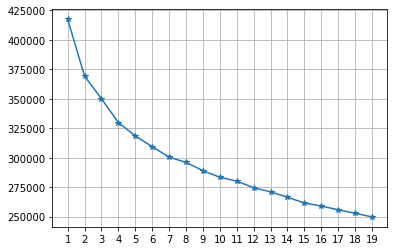

In [259]:
ax = plt.subplot()
k=list(inertias.keys())
v=list(inertias.values())
ax.plot(k,v, '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [236]:
# Kmeans
kmeans = KMeans(n_clusters=3, random_state=2020)
y_pred = kmeans.fit_predict(X_scaled)
segmentation['y_pred'] = y_pred
segmentation

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,attribution_technical,attribution_survey,op_sys,y_pred
2,26844789,enhanced,regional,replace OTT,36.001186,25.0,True,organic,facebook,iOS,1
3,29417030,base,drama,replace OTT,20.051667,30.0,False,search,tv,Android,1
4,26723159,base,comedy,replace OTT,22.951579,28.0,False,discovery,youtube,iOS,1
6,29726122,base,comedy,access to exclusive content,20.051667,61.0,False,bing,search,Android,2
7,20299962,base,drama,access to exclusive content,34.551230,23.0,False,email,referral,iOS,1
...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,drama,access to exclusive content,24.401536,43.0,False,email,pinterest,iOS,0
227623,21434712,enhanced,comedy,supplement OTT,28.751405,38.0,False,facebook,facebook_organic,iOS,1
227624,25843074,enhanced,comedy,replace OTT,27.301448,49.0,False,google_organic,referral,iOS,0
227625,24799085,base,comedy,access to exclusive content,31.651317,45.0,False,facebook,facebook,iOS,0


In [98]:
segmentation.to_csv('segmentation.csv')

# XGBT

In [156]:
current_sub = segmentation_dummies
current_sub['predict'] = subscribers['current_sub_TF']
current_sub.loc[current_sub['predict'] == True, 'predict'] = 1
current_sub.loc[current_sub['predict'] == False, 'predict'] = 0
#current_sub.drop(['y_pred'], axis=1,inplace=True)
#current_sub = pd.get_dummies(current_sub,drop_first=True)
current_sub

,subid,weekly_consumption_hour,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,...,attribution_survey_podcast,attribution_survey_public_radio,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_iOS,predict
2,26844789,36.001186,25.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,29417030,20.051667,30.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,26723159,22.951579,28.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
6,29726122,20.051667,61.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,20299962,34.551230,23.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,24.401536,43.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
227623,21434712,28.751405,38.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
227624,25843074,27.301448,49.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
227625,24799085,31.651317,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [177]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [222]:
x,y = current_sub.iloc[:,1:63].values,current_sub.iloc[:,63].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [223]:
model = xgb.XGBClassifier(
    learning_rate =0.1,
    n_estimators=150,
    max_depth=6,
    min_child_weight=2,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    eta=0.1,
    scale_pos_weight=1,
    seed=27)

model.fit(
    x_train, 
    y_train,
    eval_metric='auc',
    eval_set=[(x_train, y_train), (x_test, y_test)],
    verbose=True,
    early_stopping_rounds=10
)

[0]	validation_0-auc:0.82461	validation_1-auc:0.82120
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.84849	validation_1-auc:0.84481
[2]	validation_0-auc:0.86459	validation_1-auc:0.86158
[3]	validation_0-auc:0.86613	validation_1-auc:0.86307
[4]	validation_0-auc:0.86855	validation_1-auc:0.86560
[5]	validation_0-auc:0.86930	validation_1-auc:0.86621
[6]	validation_0-auc:0.87101	validation_1-auc:0.86793
[7]	validation_0-auc:0.87304	validation_1-auc:0.86979
[8]	validation_0-auc:0.87716	validation_1-auc:0.87335
[9]	validation_0-auc:0.87669	validation_1-auc:0.87303
[10]	validation_0-auc:0.87741	validation_1-auc:0.87374
[11]	validation_0-auc:0.87858	validation_1-auc:0.87481
[12]	validation_0-auc:0.88047	validation_1-auc:0.87674
[13]	validation_0-auc:0.88077	validation_1-auc:0.87684
[14]	validation_0-auc:0.88108	validation_1-auc:0.87697
[15]	validation_0-auc:0.8814

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

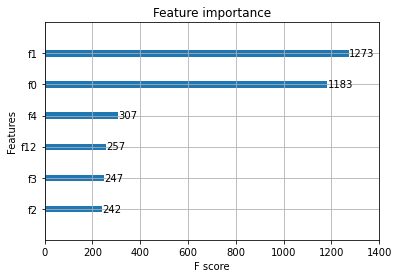

In [224]:
plot_importance(model,max_num_features=6)
plt.show()

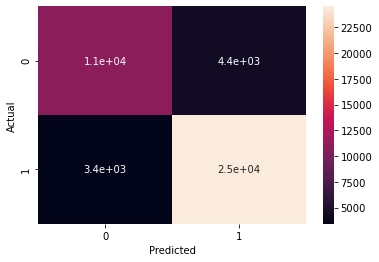

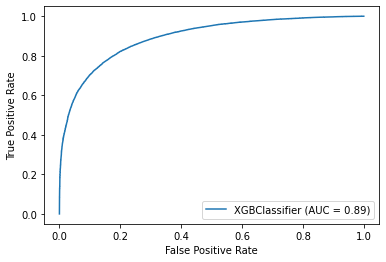

ValueError: unknown format is not supported

In [234]:
#x_test, y_test <- validation_X, validation_y
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn import metrics
#make prediction probabilities using x_test
tuned_gb_probs=model.predict_proba(x_test)

# keep probabilities for the positive outcome only
tuned_gb_probs = tuned_gb_probs[:, 1]

#make 0,1 classifications
tuned_gb_pred = model.predict(x_test)


#construct confusion matrix
confusion_matrix = pd.crosstab(y_test, tuned_gb_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

#plot ROC curve
#用以下代码查y_true是不是binary, 若不是，会报错unknown。解决方法是把y_true变成list或narray
#from sklearn.utils.multiclass import type_of_target
#print(type_of_target(y_true))
y_true = list(y_test)
metrics.plot_roc_curve(model, x_test, y_true)
plt.show()

#calculate AUC score
tuned_gb_auc = roc_auc_score(y_test, tuned_gb_probs)
print('tuned gbt tree: ROC AUC=' % (tuned_gb_auc))

# accuracy
print('Accuracy: ',metrics.accuracy_score(y_test, tuned_gb_pred))

# f1 score
print('f1 score: ',sklearn.metrics.f1_score(y_test,tuned_gb_pred))

# precision score
print('precision score: ',sklearn.metrics.precision_score(y_test,tuned_gb_pred))
  
# recall score
print('recall score: ',sklearn.metrics.recall_score(y_test,tuned_gb_pred))

In [238]:
segmentation111 = segmentation
segmentation111['y_pred'] = subscribers['current_sub_TF']
segmentation111

,subid,package_type,preferred_genre,intended_use,weekly_consumption_hour,age,male_TF,attribution_technical,attribution_survey,op_sys,y_pred
2,26844789,enhanced,regional,replace OTT,36.001186,25.0,True,organic,facebook,iOS,False
3,29417030,base,drama,replace OTT,20.051667,30.0,False,search,tv,Android,False
4,26723159,base,comedy,replace OTT,22.951579,28.0,False,discovery,youtube,iOS,True
6,29726122,base,comedy,access to exclusive content,20.051667,61.0,False,bing,search,Android,True
7,20299962,base,drama,access to exclusive content,34.551230,23.0,False,email,referral,iOS,True
...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,base,drama,access to exclusive content,24.401536,43.0,False,email,pinterest,iOS,True
227623,21434712,enhanced,comedy,supplement OTT,28.751405,38.0,False,facebook,facebook_organic,iOS,True
227624,25843074,enhanced,comedy,replace OTT,27.301448,49.0,False,google_organic,referral,iOS,True
227625,24799085,base,comedy,access to exclusive content,31.651317,45.0,False,facebook,facebook,iOS,True


In [239]:
segmentation111.to_csv('segmentation111.csv')

# Attribution

#### 思路：

将attribution_technical看作最后一个获客渠道，last interaction; attribution_survey看作第一个获客渠道，first interaction. 时间段为2019年7月至2020年2月，将这8个月看作相互独立。一共有5种获客渠道，bing, display, search, youtube, facebook。得到两个5*8的矩阵后来算average CAC 和marginal CAC。

In [97]:
from datetime import datetime

In [98]:
subscribers = pd.read_csv('subscribers.csv')
subscribers.drop(['Unnamed: 0'], axis=1, inplace=True)  
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True


In [99]:
# 取出时间里的年份和月份
subscribers['account_creation_date'] = pd.to_datetime(subscribers['account_creation_date'])
subscribers['account_creation_date'] = subscribers['account_creation_date'].map(lambda x: 100*x.year + x.month)
attribution = subscribers[['subid','attribution_technical','attribution_survey','account_creation_date']]
attribution.head()

,subid,attribution_technical,attribution_survey,account_creation_date
0,21724479,facebook,facebook,202001
1,23383224,facebook,facebook,202003
2,26844789,organic,facebook,201912
3,29417030,search,tv,202001
4,26723159,discovery,youtube,201910


In [100]:
#统计每个月每个渠道转化的用户数量
def countNum (matrix,newMatrix,time,attriType):
    a = matrix[matrix['account_creation_date']==int(time)][attriType].value_counts()
    newMatrix.at['facebook',time]  = a['facebook']
    newMatrix.at['bing',time] = a['bing']
    newMatrix.at['display',time] = a['display']
    newMatrix.at['search',time] = a['search']
    newMatrix.at['youtube',time] = a['youtube']
    return newMatrix

#统计每个月每个渠道转化的用户数量
def countNum3 (matrix,newMatrix,time,attriType):
    a = matrix[matrix['account_creation_date']==int(time)][attriType].value_counts()
    newMatrix.at['facebook',time]  = a['facebook']
    newMatrix.at['search',time] = a['search']
    newMatrix.at['youtube',time] = a['youtube']
    return newMatrix

In [103]:
#Last interaction --- attribution_technical
attributionMatrix1 = pd.DataFrame(columns=['201907', '201908', '201909','201910','201911','201912','202001','202002'],index=['facebook','bing','display','search','youtube'])

attributionMatrix1 = countNum (attribution,attributionMatrix,'201907','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'201908','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'201909','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'201910','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'201911','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'201912','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'202001','attribution_technical')
attributionMatrix1 = countNum (attribution,attributionMatrix,'202002','attribution_technical')

attributionMatrix1

,201907,201908,201909,201910,201911,201912,202001,202002
facebook,9959,9819,6105,9449,12949,9262,6277,7968
bing,116,71,84,85,102,28,171,300
display,44,74,12,50,89,112,529,336
search,1320,1927,1841,2322,2498,3748,4047,4273
youtube,8,15,2,11,47,75,370,205


In [196]:
attributionMatrix1.to_csv('attributionMatrix1.csv')

In [104]:
#First interaction --- attribution_survey
attributionMatrix2 = pd.DataFrame(columns=['201907', '201908', '201909','201910','201911','201912','202001','202002'],index=['facebook','search','youtube'])
attribution.dropna(subset=['attribution_survey'],inplace=True) 

attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'201907','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'201908','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'201909','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'201910','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'201911','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'201912','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'202001','attribution_survey')
attributionMatrix2 = countNum3 (attribution,attributionMatrix2,'202002','attribution_survey')

attributionMatrix2

<ipython-input-104-9d6a0b2afba9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attribution.dropna(subset=['attribution_survey'],inplace=True)


,201907,201908,201909,201910,201911,201912,202001,202002
facebook,14451,15399,11702,13418,16930,13394,10157,11809
search,536,786,783,853,864,1032,1151,1344
youtube,85,264,209,274,312,245,725,546


In [197]:
attributionMatrix2.to_csv('attributionMatrix2.csv')

# churn

In [216]:
churn = segmentation_dummies
subscribers1 = subscribers[['subid','join_fee','initial_credit_card_declined','payment_period']]
churn = pd.merge(churn,subscribers1,on='subid',how='left')
churn = pd.get_dummies(churn,drop_first=True)
churn['payment_period'].replace([0,1,2,3],[1,0,0,0],inplace=True)
churn['initial_credit_card_declined'].replace([False,True],[0,1],inplace=True)
churn

,subid,weekly_consumption_hour,age,package_type_economy,package_type_enhanced,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,intended_use_education,...,attribution_survey_referral,attribution_survey_search,attribution_survey_sirius xm,attribution_survey_social_organic,attribution_survey_tv,attribution_survey_youtube,op_sys_iOS,join_fee,initial_credit_card_declined,payment_period
0,26844789,36.001186,25.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0.1101,0,1
1,29417030,20.051667,30.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0.0367,0,1
2,26723159,22.951579,28.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0.0367,0,0
3,29726122,20.051667,61.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.3303,0,0
4,20299962,34.551230,23.0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144046,25835684,24.401536,43.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0.0000,0,0
144047,21434712,28.751405,38.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0.3303,0,0
144048,25843074,27.301448,49.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0.3303,0,0
144049,24799085,31.651317,45.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0367,1,0


In [217]:
churn.to_csv('churn.csv')

In [187]:
# 导入库
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 使文字可以展示
plt.rcParams['font.sans-serif'] = ['SimHei']
# 使负号可以展示
plt.rcParams['axes.unicode_minus'] = False

In [212]:
# 设置 X 和 y
X = churn.iloc[:, 0:64]
y = churn.iloc[:, 65]

from sklearn.model_selection import train_test_split
# 设置训练数据集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# 数据标准化
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# 将训练数据标准化
X_train_std = stdsc.fit_transform(X_train)
# 将测试数据标准化
X_test_std = stdsc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 10)
# lr在原始测试集上的表现
lr.fit(X_train_std, y_train)
# 打印训练集精确度
print('Training accuracy:', lr.score(X_train_std, y_train))
# 打印测试集精确度
print('Test accuracy:', lr.score(X_test_std, y_test))
# 打印系数
print(lr.coef_)
# 打印截距
lr.intercept_

Training accuracy: 0.8091138989438191
Test accuracy: 0.8071316179192891
[[ 4.74780680e-03 -5.80479272e-01  6.00116041e-01  3.60202383e-01
  -2.78126820e-01  6.24663813e-01  2.13025489e-01  4.28767922e-01
   3.78394041e-01  1.73622023e-02  2.07343384e-02  3.12550677e-02
   2.29471674e-01  1.25515754e+00  3.79227630e-02  4.32117106e-01
   1.71377231e-03 -4.28367158e-02  1.23917129e-02 -5.35664377e-02
  -9.85282243e-02  3.23466382e-02 -3.62156026e-03 -1.31269208e-02
  -7.44390922e-02 -3.25568056e-02 -5.54428043e-02 -8.03905105e-02
  -2.31734950e-01 -4.52883471e-02  4.32649185e-03 -1.12365600e-01
  -2.09632810e-02 -4.62503870e-02 -1.12269472e-02 -7.58004635e-03
  -1.09488883e-01 -1.90749966e-02  3.67995806e-03 -2.84869133e-03
  -7.21689757e-03 -3.84818383e-02  2.36458043e-02 -1.67774294e-01
  -4.30371224e-03 -9.32613348e-03 -1.54384388e-02  1.19971421e-02
  -8.94892783e-03  5.78780184e-01  1.11732126e-02 -1.83172482e-02
   4.71909282e-02 -1.15138488e-03  3.47945598e-02  5.07255717e-03
  -4

array([-0.90636819])

[[24158  3411]
 [ 4924 10723]]


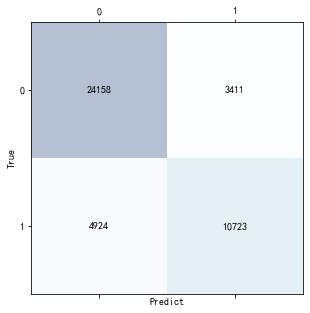

In [203]:
### from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

# 将混淆矩阵可视化
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

In [190]:
# 获取模型的准确率和召回率
from sklearn.metrics import precision_score, recall_score, f1_score
# 准确率
print('Precision: %.4f' % precision_score(y_true=y_test, y_pred=y_pred))
# 召回率
print('Recall: %.4f' % recall_score(y_true=y_test, y_pred=y_pred))
# F1
print('F1: %.4f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.7587
Recall: 0.6853
F1: 0.7201


In [195]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_pred)

0.7807905817877535